<center>
    <img src="paris8.jpg" width="40%" />
    <br />
    <h1>Corpus, fouilles de données et apprentissage ( machine learning)</h1>
    <h4>Théme: "Reconnaissance des activités par fouille de données en utilisant scikit-learn, tsfresh"</h4>
    <br /><br />
    <a href="mailto:massil.ksouri@etud.univ-paris8.fr">KSOURI Massil</a>
    <a href="mailto:amar.bessalah@etud.univ-paris8.fr">BESSALAH Amar</a>
    <br /><br />
    Université Paris 8 Vincennes – Saint-Denis
</center>

In [12]:
#importation des bibliotheques
import tsfresh as tf
import matplotlib
import pandas
import csv
import os
import numpy as np
import tsfresh as tsf
import sklearn.tree as skt
import sklearn.metrics as skm
import sklearn.neighbors as skn
import sklearn.model_selection as skms
import sklearn.ensemble as ske
import warnings
from matplotlib import pyplot as plt
from tsfresh.feature_extraction import extract_features,MinimalFCParameters
from tsfresh import extract_features

In [2]:
#Définir le dataFrame
master_df = pandas.DataFrame()
#La liste des classes
class_names = ["Working at Computer", "Standing Up, Walking and Going up\down stairs", "Standing", "Walking", 
               "Going Up\Down Stairs", "Walking and Talking with Someone", "Talking while Standing"]
#Définition de compteur
id = 0
#Définition de la liste y qui contiendra les classes de données
y = []

#Parcours et chargement des fichier csv
#Liste contenant les URL des fichiers excel à charger
fichiers = ["ds/1.csv", "ds/2.csv", "ds/3.csv", "ds/4.csv", "ds/5.csv", "ds/6.csv", "ds/7.csv", "ds/8.csv", "ds/9.csv",
            "ds/10.csv","ds/11.csv", "ds/12.csv", "ds/13.csv", "ds/14.csv", "ds/15.csv"]

#Définition de la liste qui contiendra les dataFrames
dataF = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

#Chargement des fichers Excel dans les DataFrame
i = 0
for fichier in fichiers:
    #Chargement des fichier dans un dataFrame
    dataF[i] = (pandas.read_csv(fichier, names=["step", "x", "y","z", "classe"]))
    #Suppression de la colonne step
    dataF[i] = dataF[i][["x","y","z","classe"]]
    #Suppression des ligne avec class vide
    dataF[i] = dataF[i] [ dataF[i].classe != 0 ]
    i = i+1
    
#print(dataF)

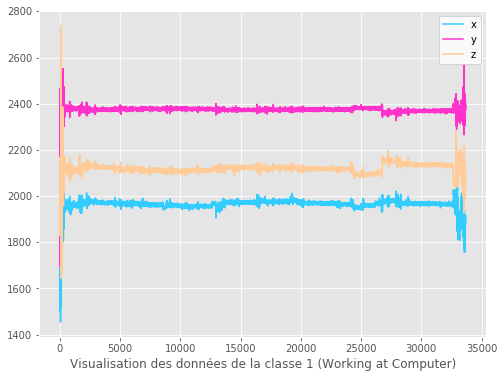

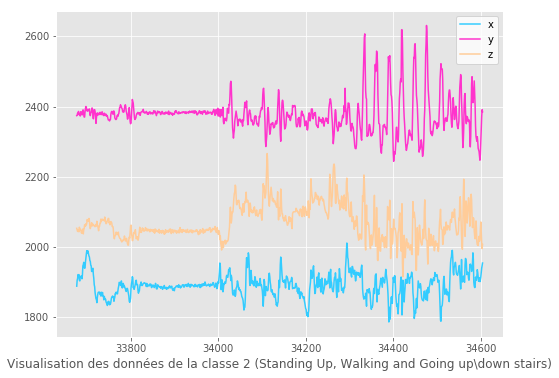

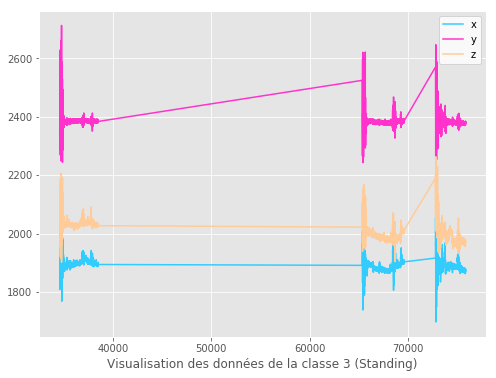

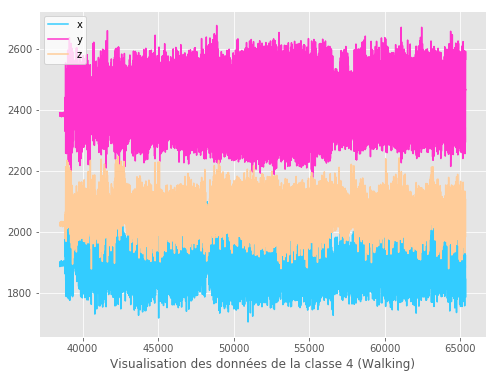

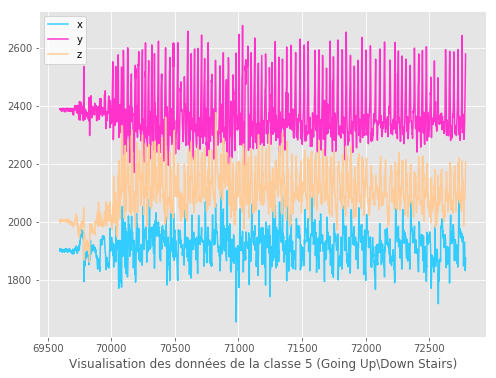

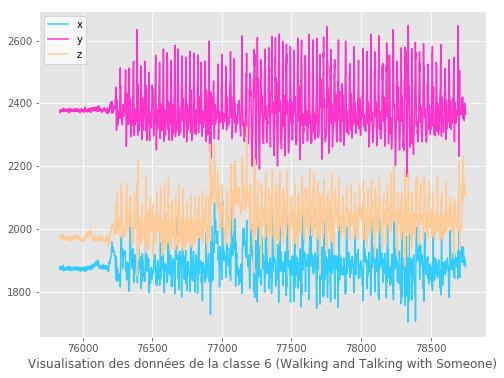

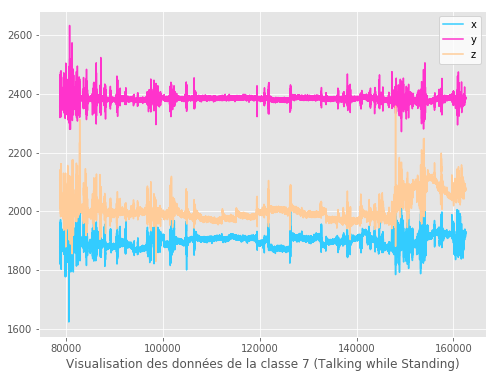

In [3]:
#Affichage des données ddu fichier csv n-01
#Parcourir les différentes classes du fichier csv n-01
for classVisualise in range(1,8):
    classe = dataF[0] [ dataF[0].classe == classVisualise ]
    #Extraire les données de la colonne x
    classeX = classe[["x"]]
    #Extraire les données de la colonne y
    classeY = classe[["y"]]
    #Extraire les données de la colonne z
    classeZ = classe[["z"]]
    #Visualisation
    with plt.style.context('ggplot'):
        fig = plt.figure(figsize=(8,6))
        ax1 = fig.add_subplot(1,1,1)
        #Attribuer les données à afficher dans chaque axe et définir ses caractéristiques
        ax1.plot(classeX,color='#33CCFF',marker='',linestyle='-',label='x')
        ax1.plot(classeY,color='#FF33CC',marker='',linestyle='-',label='y')
        ax1.plot(classeZ,color='#FFCC99',marker='',linestyle='-',label='z')

    #Définir l'intervale des données à visualiser (Si on veut visualiser une partie des données)
    #ax1.set_xlim([0,101])
    #ax1.set_ylim([1400,2600])
    
    #Titre du graphe
    ax1.set_xlabel('Visualisation des données de la classe '+str(classVisualise)+' ('+class_names[classVisualise-1]+')')
    #Positionnement de la légende
    ax1.legend(loc='best')  

plt.show()

In [4]:
#Définition de la fonction preparation
def preparation(df, id, y, length=100) :
    classes = [1,2,3,4,5,6,7]
    rdf = pandas.DataFrame()
    #Séparer le dataFrame par classe
    for classe in classes:
        df_class = df [ df.classe == classe ]
        #Diviser les élément de la meme classe en dataFrame de 100 éléments
        df_i = np.array_split(df_class, df_class.shape[0]/length)
        #Parccourir les df_i
        for df_i_actuel in df_i:
            #Ajouter le nom de la classe de l'élément actuel à la liste y
            y.append(class_names[classe-1])         
            #Supprimer la colonne classe
            df_i_actuel = df_i_actuel.drop(["classe"],axis=1)
            #Ajouter une colonne id contenant la valeur actuelle du compteur id
            df_i_actuel.insert(3, 'id', id)                            
            id = id+1
            #Ajouter les tableaux au tableau de fusion et les retourner avec id et y
            rdf = rdf.append(df_i_actuel)
    return rdf,id,y

In [5]:
#Transformer et Fusionner tous les jeux de données dans master_df
y = []
id = 0
for data in dataF:
    temp_df, id, y = preparation(data, id, y)
    master_df = master_df.append(temp_df)

In [6]:
#Vérification de bon déroulement de la phase de préparation
print(len(y))
print(id)

19189
19189


In [7]:
#Définir la configuration de l'extracteur des statistiques en MinimalFeatureExtractionSettings
df= MinimalFCParameters()
#Lancer l'extraction des features sur master_df en regroupant par la colonne id
X = tsf.extract_features(master_df, column_id='id', default_fc_parameters=MinimalFCParameters())  
#print(X)
#help(MinimalFeatureExtractionSettings)

Feature Extraction: 100%|██████████| 10/10 [00:24<00:00,  1.91s/it]


In [8]:
#help(skms.train_test_split)
#Préparation des données pour l’apprentissage
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2)

In [9]:
#Faire l’apprentissage en DecisionTree
clfDT = skt.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)
clfDT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
#Faire l’apprentissage en KNN
#help(skn.KNeighborsClassifier)
clfKNN = skn.KNeighborsClassifier(n_neighbors=10)
clfKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [15]:
#Faire l’apprentissage en RandomForestClassifier
clfRFC = ske.RandomForestClassifier()
clfRFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
#Faire l’apprentissage en AdaBoostClassifier
clfABC = ske.AdaBoostClassifier()
clfABC.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [17]:
#Tester les classifieurs avec les données de test
testKNN = clfKNN.predict(X_test)
testDT = clfDT.predict(X_test)
testRFC = clfRFC.predict(X_test)
testABC = clfABC.predict(X_test)

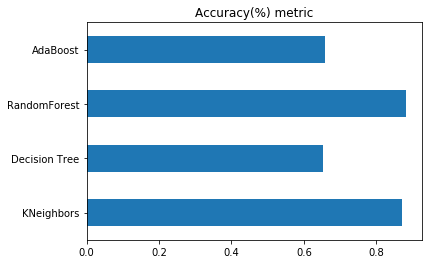

In [18]:
#help(skm.accuracy_score)
#Utiliser accuracy_score comme métrique
#print(skm.accuracy_score(y_test,testKNN))
#print(skm.accuracy_score(y_test,testDT))
#print(skm.accuracy_score(y_test,testRFC))
#print(skm.accuracy_score(y_test,testABC))

#Affichage de l'histogramme de comparaison
#Attribuer les données à afficher
mesureGraph = pandas.DataFrame([skm.accuracy_score(y_test,testKNN), 
                                skm.accuracy_score(y_test,testDT),
                                skm.accuracy_score(y_test,testRFC),
                                skm.accuracy_score(y_test,testABC)],
                                #définir l'index de chaque barre
                                index=['KNeighbors','Decision Tree','RandomForest','AdaBoost'],
                                columns=['Accuracy %'])
#Type (barh = barre horizontale) et titre du l'histogramme
mesureGraph.plot(kind='barh', legend=False, sort_columns=True, title="Accuracy(%) metric")
#Afficher
plt.show()
#help(mesureGraph.plot)

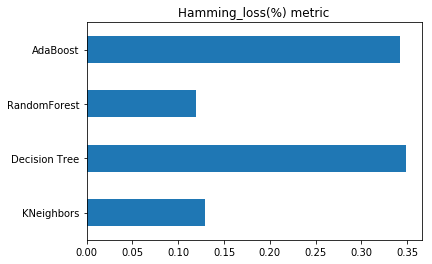

In [19]:
#Utiliser confusion_matrix comme métrique
#print(skm.hamming_loss(y_test,testKNN, labels = class_names))
#print(skm.hamming_loss(y_test,testDT, labels = class_names))
#print(skm.hamming_loss(y_test,testRFC, labels = class_names))
#print(skm.hamming_loss(y_test,testABC, labels = class_names))

#Affichage de l'histogramme de comparaison
#Attribuer les données à afficher
mesureGraph = pandas.DataFrame([skm.hamming_loss(y_test,testKNN), 
                                skm.hamming_loss(y_test,testDT),
                                skm.hamming_loss(y_test,testRFC),
                                skm.hamming_loss(y_test,testABC)],
                                #définir l'index de chaque barre
                                index=['KNeighbors','Decision Tree','RandomForest','AdaBoost'],
                                columns=['hamming_loss %'])
#Type (barh = barre horizontale) et titre du l'histogramme
mesureGraph.plot(kind='barh', legend=False, sort_columns=True, title="Hamming_loss(%) metric")
#Afficher
plt.show()

In [20]:
#help(skm.classification_report)
#help(skm.classification)
#Utiliser classification_report comme métrique
print("KNN")
print(skm.classification_report(y_test,testKNN))
print("Decision Tree")
print(skm.classification_report(y_test,testDT))
print("RandomForest")
print(skm.classification_report(y_test,testRFC))
print("AdaBoost")
print(skm.classification_report(y_test,testABC))

KNN
                                               precision    recall  f1-score   support

                         Going Up\Down Stairs       0.69      0.59      0.64       111
                                     Standing       0.70      0.67      0.69       424
Standing Up, Walking and Going up\down stairs       0.77      0.52      0.62       109
                       Talking while Standing       0.88      0.92      0.90      1142
                                      Walking       0.85      0.92      0.88       725
             Walking and Talking with Someone       0.84      0.69      0.76        91
                          Working at Computer       0.95      0.93      0.94      1236

                                    micro avg       0.87      0.87      0.87      3838
                                    macro avg       0.81      0.75      0.78      3838
                                 weighted avg       0.87      0.87      0.87      3838

Decision Tree
                      

In [21]:
#help(skm.confusion_matrix)
#Utiliser confusion_matrix comme métrique
print(skm.confusion_matrix(y_test,testKNN, labels = class_names))
print(skm.confusion_matrix(y_test,testDT, labels = class_names))
print(skm.confusion_matrix(y_test,testRFC, labels = class_names))
print(skm.confusion_matrix(y_test,testABC, labels = class_names))

[[1153    7   20   14    1    0   41]
 [  15   57    9   10    5    2   11]
 [  11    4  286   51    9    2   61]
 [   6    3   30  669    3    0   14]
 [   5    0   17   19   66    0    4]
 [   1    1    7   11    1   63    7]
 [  22    2   37   16   10    8 1047]]
[[1102    0    5   15    0    0  114]
 [  43   45    0   15    2    0    4]
 [ 189    5    8   83    1    0  138]
 [  58    0   11  635    0    0   21]
 [  29   13    2   45    9    0   13]
 [  30   18    0   18    1    5   19]
 [ 397    0    9   38    0    0  698]]
[[1163    6   21    5    0    1   40]
 [  11   66   10   10    5    1    6]
 [   4    3  283   49    8    1   76]
 [   6    5   34  667    4    0    9]
 [   1    0   17   21   62    0   10]
 [   0    2    6   10    2   57   14]
 [  13    1   22   15    6    2 1083]]
[[1006    0   21   13    0    2  194]
 [  28   38   17   14    4    1    7]
 [  53    6   58   84    4    4  215]
 [  34    7   38  603    7    2   34]
 [   6   15    7   44    5    2   32]
 [   0   

In [22]:
#Définir une fonction d'affichage de matrice de confusion en forme de matrice thermique
def afficheConfusionMatrice(cm, algorithme):
    import itertools
    #Matrice de confusion pour Random Forest
    labels = class_names
    #Définir le graphe
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix de '+algorithme)
    #Afficher l'échelle
    fig.colorbar(cax)
    #Ajouter une étiquette aux colonnes qui contiennent le nombre d'éléments
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > 0 else "black")
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

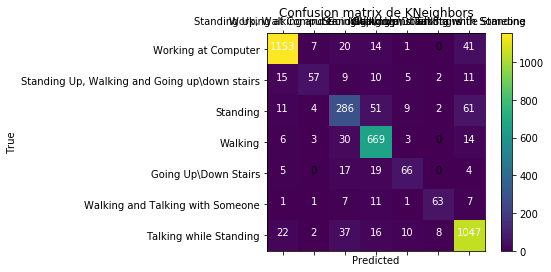

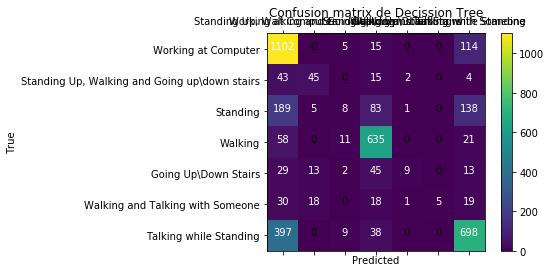

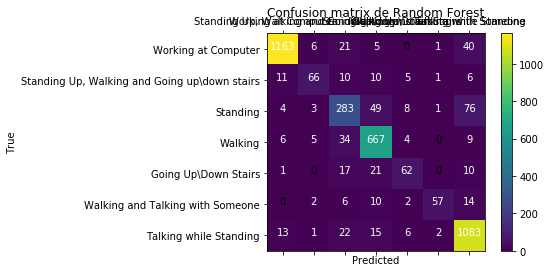

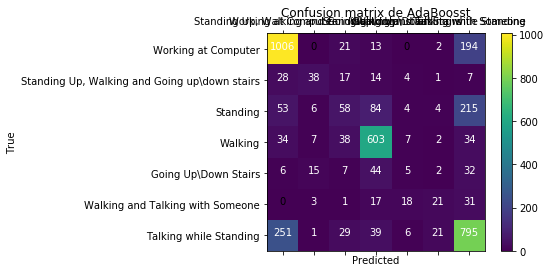

In [23]:
#Afficher les matrice de confusion
#L'échelle montre le nombre des éléments devant être dans une classe i et qui ont été attribués à j
afficheConfusionMatrice(skm.confusion_matrix(y_test,testKNN, labels = class_names), 'KNeighbors')
afficheConfusionMatrice(skm.confusion_matrix(y_test,testDT, labels = class_names), 'Decission Tree')
afficheConfusionMatrice(skm.confusion_matrix(y_test,testRFC, labels = class_names), 'Random Forest')
afficheConfusionMatrice(skm.confusion_matrix(y_test,testABC, labels = class_names), 'AdaBoosst')
